## Build Models To Compare Features: Raw Original Features

### Read In Data

In [4]:
# Read in data
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

train_features = pd.read_csv('../Data/Final_Data/train_features_raw.csv')
train_labels = pd.read_csv('../Data/Final_Data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,62.0,0,0,10.5000,147,2
1,3,1,8.0,4,1,29.1250,147,1
2,3,1,32.0,0,0,56.4958,147,2
3,3,0,20.0,1,0,9.8250,147,2
4,2,0,28.0,0,0,13.0000,147,2


---------------

In [11]:
train_features.corr()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
Pclass,1.000000,0.144365,-0.308317,0.100618,0.026554,-0.521679,0.705147,0.131683
Sex,0.144365,1.000000,0.112797,-0.094233,-0.263976,-0.172773,0.132782,0.114308
Age_clean,-0.308317,0.112797,1.000000,-0.230905,-0.186328,0.080736,-0.234379,0.034879
SibSp,0.100618,-0.094233,-0.230905,1.000000,0.456639,0.152229,0.065242,0.086624
Parch,0.026554,-0.263976,-0.186328,0.456639,1.000000,0.215607,-0.009244,0.088276
Fare,-0.521679,-0.172773,0.080736,0.152229,0.215607,1.000000,-0.479924,-0.180282
Cabin,0.705147,0.132782,-0.234379,0.065242,-0.009244,-0.479924,1.000000,0.171695
Embarked,0.131683,0.114308,0.034879,0.086624,0.088276,-0.180282,0.171695,1.000000


In [15]:
np.triu(train_features.corr())

array([[ 1.        ,  0.14436488, -0.30831651,  0.10061799,  0.02655439,
        -0.52167856,  0.70514694,  0.13168293],
       [ 0.        ,  1.        ,  0.11279719, -0.09423319, -0.26397574,
        -0.17277304,  0.13278164,  0.11430842],
       [ 0.        ,  0.        ,  1.        , -0.23090485, -0.18632796,
         0.08073582, -0.2343785 ,  0.03487908],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.45663939,
         0.15222918,  0.06524201,  0.08662378],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.21560728, -0.00924411,  0.08827571],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        , -0.47992374, -0.18028202],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.17169453],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

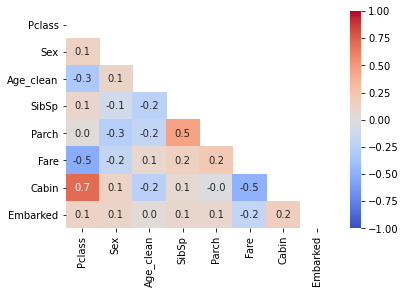

In [6]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

### GridSearchCV

- it will pull the first item in the list for each parameter setting. (n_estimators: 8, max_depth: 2)
- then it will run cross validation and it will store the average accuracy and standard deviation of accuracy across the five folds.
- then it will move on to the next hyperparameter combination and do the same.
- so by the end, each hypermeter combination will have been run through cross validation to give us pretty clean read on the best hyperparameter settings
- <strong>NOTE: GridsSearchCV will automaticallly fit 100% of training date on best estimator, once it is selected.</strong> During cross validation, it will use 80% data for training though.

In [7]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score'] 
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/- {}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [8]:
# Conduct search for best params while running cross-validation (GridSearchCV)
# default setting for parameters: n_estimators: 100, max_depth : None

rf = RandomForestClassifier()

parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())  #sklearn only accept array, so we need to convert labels from pandas column to array

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 256}

0.777 (+/- 0.101) for {'max_depth': 2, 'n_estimators': 8}
0.779 (+/- 0.118) for {'max_depth': 2, 'n_estimators': 16}
0.779 (+/- 0.087) for {'max_depth': 2, 'n_estimators': 32}
0.794 (+/- 0.103) for {'max_depth': 2, 'n_estimators': 64}
0.783 (+/- 0.116) for {'max_depth': 2, 'n_estimators': 128}
0.8 (+/- 0.11) for {'max_depth': 2, 'n_estimators': 256}
0.794 (+/- 0.108) for {'max_depth': 2, 'n_estimators': 512}
0.809 (+/- 0.102) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/- 0.124) for {'max_depth': 4, 'n_estimators': 16}
0.807 (+/- 0.098) for {'max_depth': 4, 'n_estimators': 32}
0.826 (+/- 0.108) for {'max_depth': 4, 'n_estimators': 64}
0.817 (+/- 0.119) for {'max_depth': 4, 'n_estimators': 128}
0.824 (+/- 0.102) for {'max_depth': 4, 'n_estimators': 256}
0.82 (+/- 0.114) for {'max_depth': 4, 'n_estimators': 512}
0.826 (+/- 0.077) for {'max_depth': 8, 'n_estimators': 8}
0.828 (+/- 0.048) for {'max_depth': 8, 'n_estimators': 16}
0.828 

### Feature Importance
- RandomForest can compute a feature important score for each feature based on how important it was in the fitting of the model.
- As GridSearchCV stores the best model as an attirbute, we can pass it in

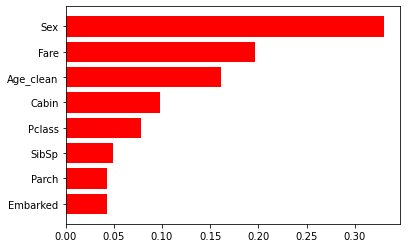

In [10]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

- Based on the chart above, it seems that Sex is the most important, which is not suprising.
- Age_clean is more important than Pclass. In our prior analysis, it looked like age is not a strong predictor of whether a passenger would survive. While it looked like Pclass was a very strong predictor. However Passenger class is very highly correlated with both whether somebody had a cabin and fare they paid. So it might be a good example of model getting a little confused between which of these features is really driving the relationship with the target variable.

----------

### Write Out Pickled Model

In [17]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../Pickled_Models/mdl_raw_original_features.pkl')

['../Pickled_Models/mdl_raw_original_features.pkl']